In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder

df = pd.read_csv("C:/Users/ksnit/Downloads/iris1.csv")
head=df.head 
print(head)


<bound method NDFrame.head of       Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm  \
0      1            5.1           3.5            1.4           0.2   
1      2            4.9           3.0            1.4           0.2   
2      3            4.7           3.2            1.3           0.2   
3      4            4.6           3.1            1.5           0.2   
4      5            5.0           3.6            1.4           0.2   
..   ...            ...           ...            ...           ...   
145  146            6.7           3.0            5.2           2.3   
146  147            6.3           2.5            5.0           1.9   
147  148            6.5           3.0            5.2           2.0   
148  149            6.2           3.4            5.4           2.3   
149  150            5.9           3.0            5.1           1.8   

            Species  
0       Iris-setosa  
1       Iris-setosa  
2       Iris-setosa  
3       Iris-setosa  
4       Iris-setosa

In [5]:
label_encoder = LabelEncoder()
df['Species'] = label_encoder.fit_transform(df['Species'])

X_features = df.drop('Species', axis=1)
y_label = df['Species']
X_train, X_test, y_train, y_test = train_test_split(X_features, y_label, test_size=0.2, random_state=1)
print(X_train, X_test, y_train, y_test)


      Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
91    92            6.1           3.0            4.6           1.4
135  136            7.7           3.0            6.1           2.3
69    70            5.6           2.5            3.9           1.1
128  129            6.4           2.8            5.6           2.1
114  115            5.8           2.8            5.1           2.4
..   ...            ...           ...            ...           ...
133  134            6.3           2.8            5.1           1.5
137  138            6.4           3.1            5.5           1.8
72    73            6.3           2.5            4.9           1.5
140  141            6.7           3.1            5.6           2.4
37    38            4.9           3.1            1.5           0.1

[120 rows x 5 columns]       Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
14    15            5.8           4.0            1.2           0.2
98    99            5.1           2.5 

In [6]:
k_values =(range(1,9)) 
# Initialize lists to store accuracy and error rate values
accuracies = []
error_rates = []

# Train the KNN model for each k value and record accuracy and error rate
for k in k_values:
    knn_model = KNeighborsClassifier(n_neighbors=k)
    knn_model.fit(X_train, y_train)
    accuracy = knn_model.score(X_test, y_test)
    error_rate = 1 - accuracy
    accuracies.append(accuracy)
    error_rates.append(error_rate)
print(accuracies)
print(error_rates)



[1.0, 1.0, 0.9666666666666667, 1.0, 1.0, 1.0, 0.9666666666666667, 1.0]
[0.0, 0.0, 0.033333333333333326, 0.0, 0.0, 0.0, 0.033333333333333326, 0.0]


C:\Users\ksnit\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\ksnit\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

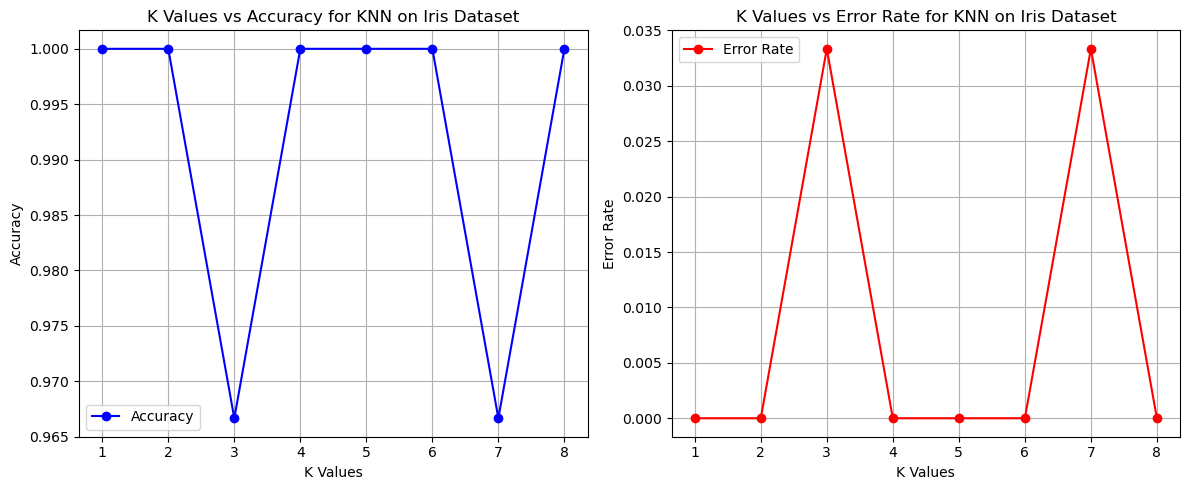

In [7]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

ax1.plot(k_values, accuracies, marker='o', label='Accuracy', color='blue')
ax1.set_title('K Values vs Accuracy for KNN on Iris Dataset')
ax1.set_xlabel('K Values')
ax1.set_ylabel('Accuracy')
ax1.grid(True)
ax1.legend()

ax2.plot(k_values, error_rates, marker='o', label='Error Rate', color='red')
ax2.set_title('K Values vs Error Rate for KNN on Iris Dataset')
ax2.set_xlabel('K Values')
ax2.set_ylabel('Error Rate')
ax2.grid(True)
ax2.legend()

plt.tight_layout()
plt.show()
